In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df=pd.read_csv('cleaned_armenian_car_prices.csv')

In [6]:
# Preprocessing
df['Year'] = pd.to_datetime(df['Year']).dt.year

X = df.drop(columns=['Price'])
y = df['Price']

categorical_features = ['Car Name', 'Region', 'FuelType']
numerical_features = ['Year', 'Mileage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 334101632.0000 - mae: 14266.5264 - val_loss: 288471648.0000 - val_mae: 12916.3779
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 241255584.0000 - mae: 11131.8418 - val_loss: 119635480.0000 - val_mae: 7988.0176
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 118774672.0000 - mae: 8080.2163 - val_loss: 116563912.0000 - val_mae: 8065.6338
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 123342920.0000 - mae: 8204.2363 - val_loss: 114574200.0000 - val_mae: 7975.0337
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 117843368.0000 - mae: 8030.9116 - val_loss: 113448952.0000 - val_mae: 7797.5898
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 114230296.0000 - mae: 7822.0112 - val_loss: 112405120.0000 - val_mae: 7902.6880
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 111223832.0000 - mae: 7820.9233 - val_loss: 111568384.0000 - val_mae: 7803.6055
Epoch 8/50
157/1

In [11]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Loss: {loss}, MAE: {mae}')
     

Model Loss: 124237440.0, MAE: 8373.1298828125


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


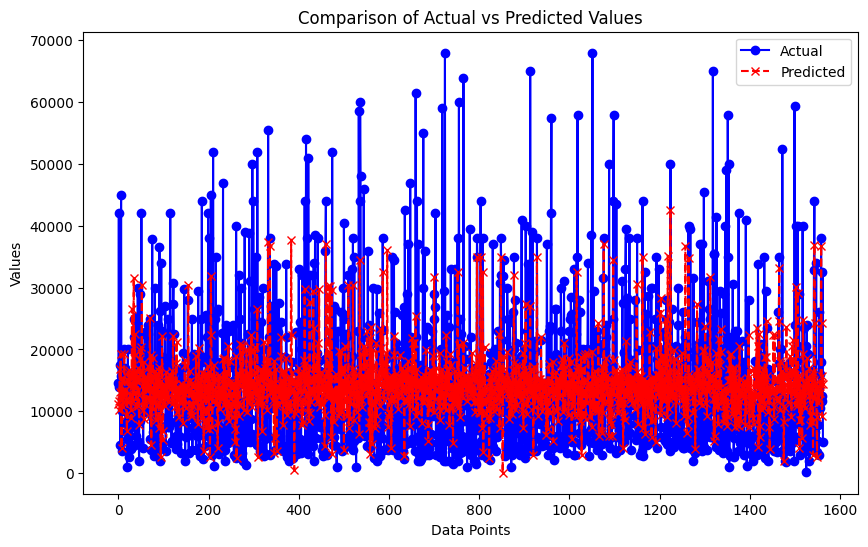

In [12]:
import matplotlib.pyplot as plt

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Plot perbandingan nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', marker='o', linestyle='-', label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='red', marker='x', linestyle='--', label='Predicted')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()